In [1]:
from flask import Flask, request
from flask_pymongo import PyMongo
from bson.objectid import ObjectId

## 作業 1
- 使用 Post，傳入參數 name, age, email 參數，並把資料存入 Member Collection。

In [3]:
app = Flask(__name__)
app.config["MONGO_URI"] = "mongodb://localhost:27017/test"
mongo = PyMongo(app)


@app.route('/member', methods = ['POST'])
def add_member():
    # 把 form 裡面的資料拿出來
    name = request.form.get('name')
    age = request.form.get('age')
    email = request.form.get('email')
    
    # 執行 insert_one 新增一筆資料
    result = mongo.db.member.insert_one({'name': name, 'age': age, 'email': email})
    
    # 回傳新增資料的 id
    return str(result.inserted_id)

if __name__=="__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [14/Jul/2021 23:15:32] "POST /member HTTP/1.1" 200 -


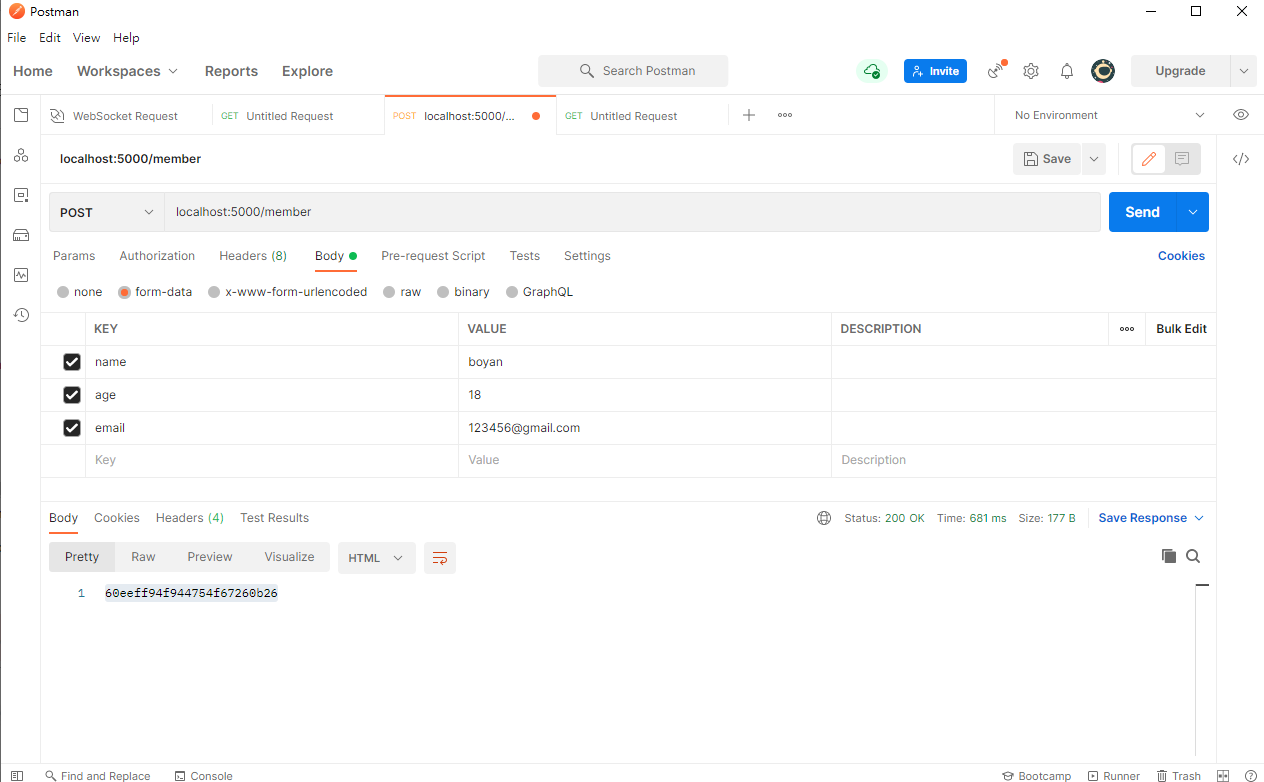

## 作業 2
- 使用 Get，取得所有的資料。
- 使用 Get，帶入要取得的資料 id 參數，並成功從 Mongo 中取得某一筆特定資料

In [4]:
app = Flask(__name__)
app.config["MONGO_URI"] = "mongodb://localhost:27017/test"
mongo = PyMongo(app)

@app.route('/member/<id>', methods = ['GET'])
def get_member(id=None):
    # 若沒有傳入 id，及取得所有會員資料
    if id is None:
        members = mongo.db.member.find({})
        result = [] # 宣告一個陣列，回傳結果時需要用到
        
        for member in members:
            member['_id'] = str(member['_id']) # mongo 回傳的 id 為 ObjectId 型別，把 id 轉成一般的字串
            result.append(member)
        return jsonify(result) # 把我們的結果轉換為 json 並回傳
    else:
        result = mongo.db.member.find_one({'_id': ObjectId(id)})
        if result is not None:
            result['_id'] = str(result['_id']) # mongo 回傳的 id 為 ObjectId 型別，把 id 轉成一般的字串
        
        return result # 把我們的結果轉換為 json 並回傳

if __name__=="__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [14/Jul/2021 23:19:30] "GET /member/60e30a6f77fae04cb7297c7e HTTP/1.1" 200 -


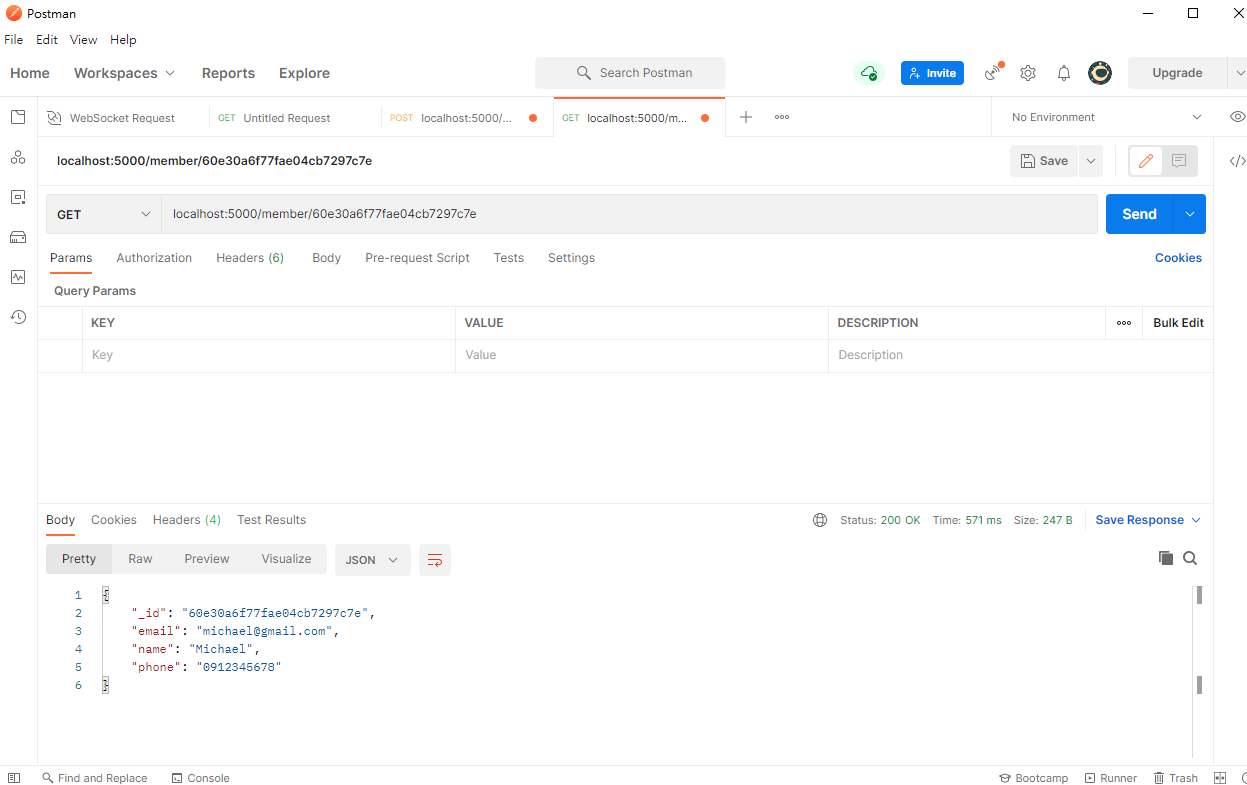

## 作業 3
- 使用 PUT，帶入要更新的資料id，並傳入 name, age, email 參數，並修改 Mongo 中某一筆資料的值。

In [5]:
app = Flask(__name__)
app.config["MONGO_URI"] = "mongodb://localhost:27017/test"
mongo = PyMongo(app)

@app.route('/member/<id>', methods = ['PUT'])
def remove_member(id):
    result = 0
    
    # 把 form 裡面的資料拿出來
    name = request.form.get('name')
    age = request.form.get('age')
    phone = request.form.get('phone')
    email = request.form.get('email')
    
    # 把新的資料用 dict 型別包裝
    new_value = { "$set": { "name": name, "age": age, "phone": phone, "email": email } }
    # 執行 update_one 進行修改
    upd_result = mongo.db.member.update_one({"_id": ObjectId(id)}, new_value)
    
    if upd_result is not None:
        result = upd_result.modified_count
    
    # 回傳更新的資料筆數
    return "Update %s data" % str(result)

if __name__=="__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [14/Jul/2021 23:24:11] "PUT /member/60e30a6f77fae04cb7297c7e HTTP/1.1" 200 -
127.0.0.1 - - [14/Jul/2021 23:25:48] "DELETE /member/60e30a6f77fae04cb7297c7e HTTP/1.1" 405 -


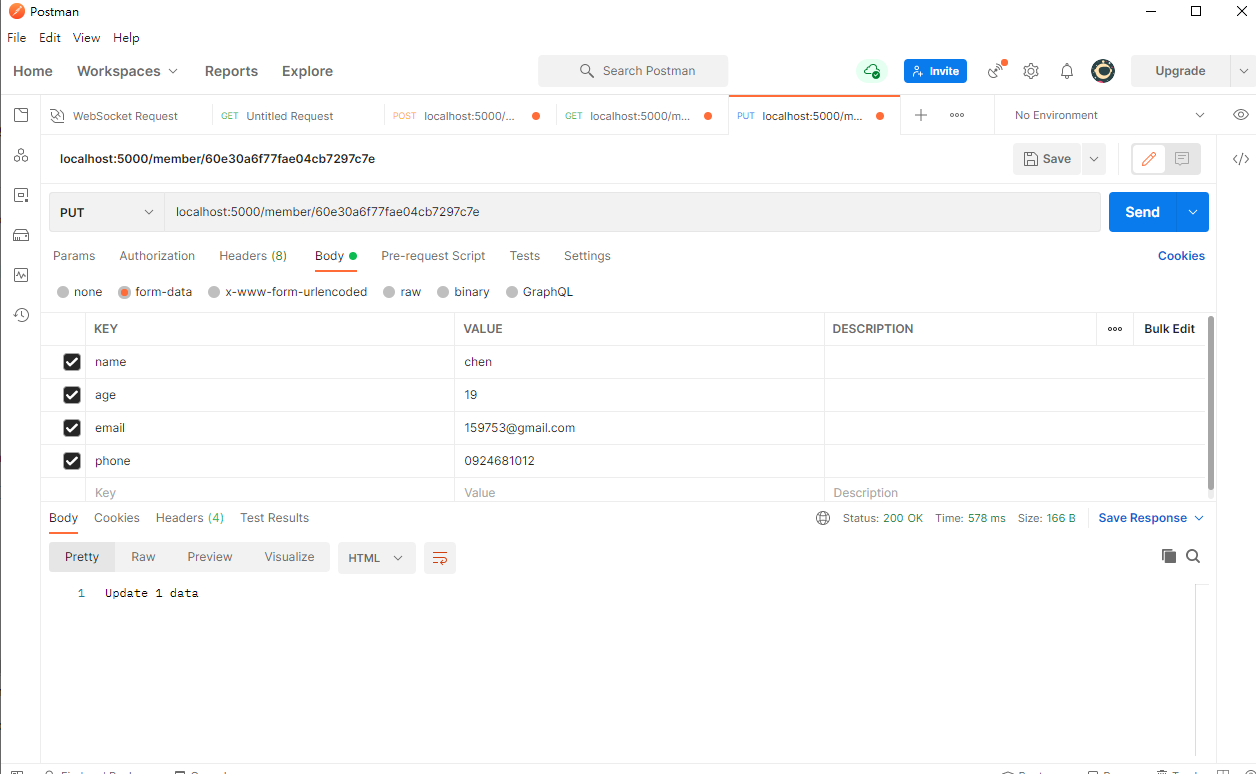

## Before

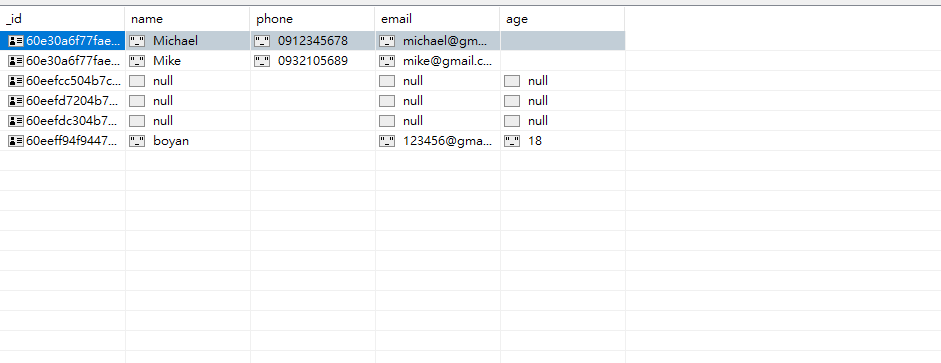

## After

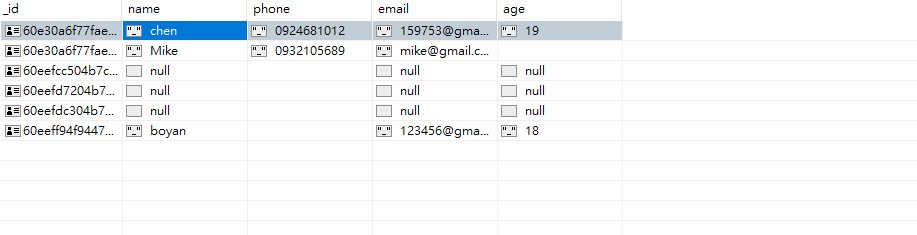

## 作業 4
- 使用 DELETE，帶入要刪除的資料 id，並刪除 Mongo 中某一筆資料。

In [7]:
app = Flask(__name__)
app.config["MONGO_URI"] = "mongodb://localhost:27017/test"
mongo = PyMongo(app)

@app.route('/member/<id>', methods = ['DELETE'])
def remove_member(id):
    result = 0
    
    # 先確定是否有該會員
    member = mongo.db.member.find_one({'_id': ObjectId(id)})
    
    # 若會員存在，執行 delete_one 刪除該會員
    if member is not None:
        del_result = mongo.db.member.delete_one(member)
        result = del_result.deleted_count
        
    # 回傳刪除的資料筆數
    return "Delete %s data" % str(result)

if __name__=="__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [14/Jul/2021 23:26:08] "DELETE /member/60e30a6f77fae04cb7297c7e HTTP/1.1" 200 -


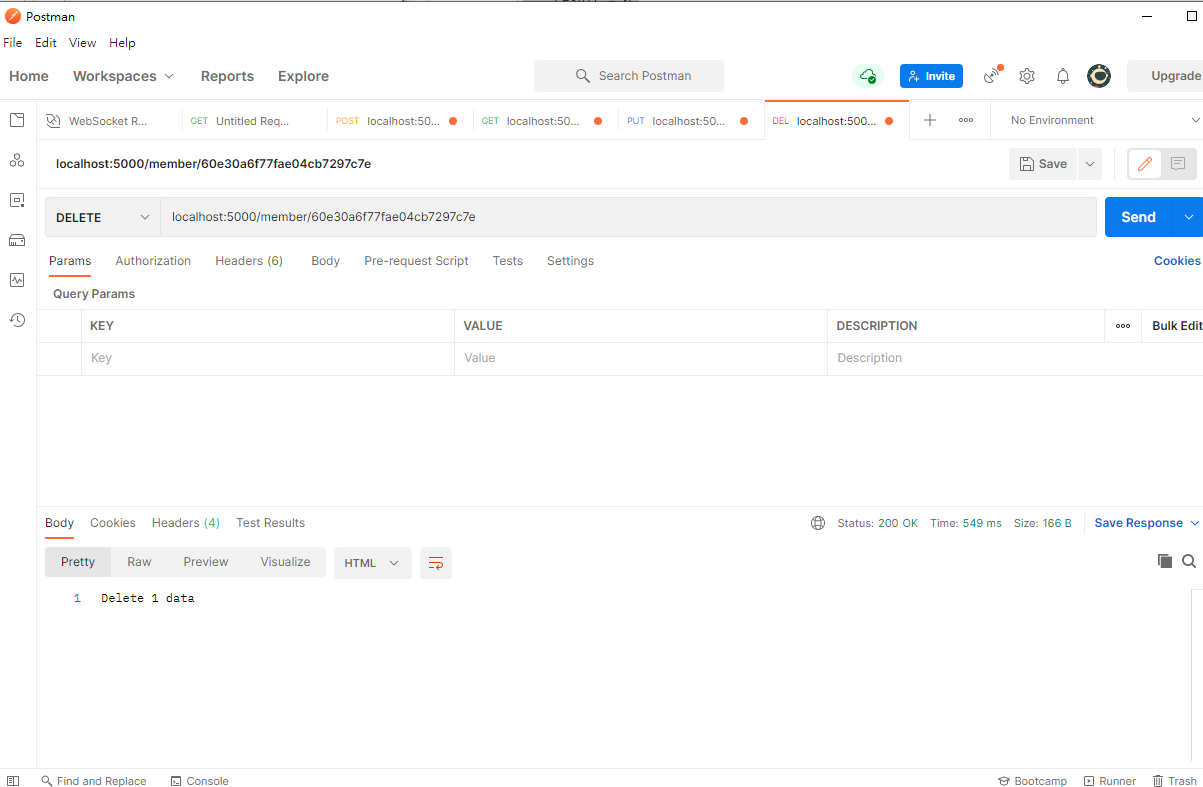

## Before

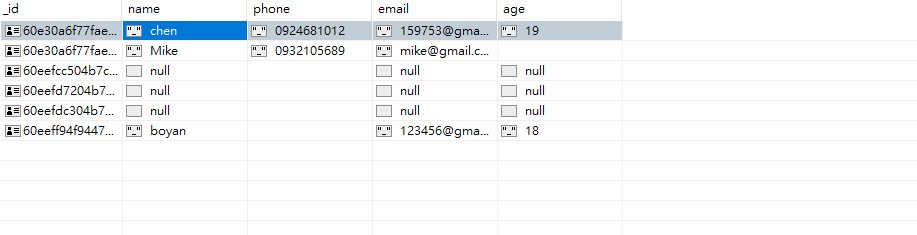

## After

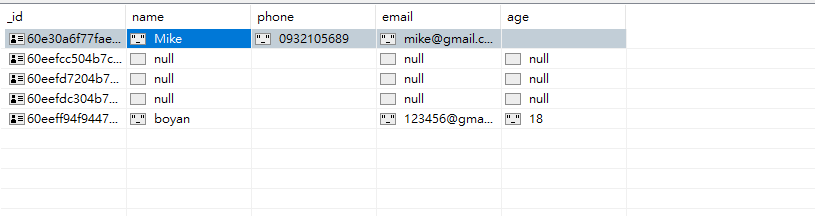